In [1]:
import math
import numpy as np
import torch as th

In [2]:
S0 = 100.0
K = 105.0
T = 1.0
r = 0.05
sigma = 0.2

I = 100000
np.random.seed(1000)

In [3]:
z = np.random.standard_normal(I)
ST = S0 * np.exp((r - sigma**2/2) * T + sigma * math.sqrt(T) * z)
hT = np.max(ST-K, 0)
C0 = math.exp(-r * T) * np.mean(hT)

In [4]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

2.98 s ± 30.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

155 ms ± 2.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
a = th.arange(1, loops, dtype = th.float32)
%timeit r = 3 * th.log(a) + th.cos(a) ** 2

46.5 ms ± 589 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

91.6 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

31.6 ms ± 504 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
import random

In [20]:
n = int(1e7)
def average_py(n):
    s = 0
    for i in range(n):
        s += random.random()
    return s/n

def average_np(n):
    return np.random.rand(n).mean()

def average_th(n):
    return th.rand(n).mean()

In [21]:
%timeit average_py(n)
%timeit average_np(n)
%timeit average_th(n)

1.7 s ± 9.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
198 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
134 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
import numba

average_nb = numba.jit(average_py)
average_nbn = numba.njit(average_py)

In [24]:
%timeit average_nb(n)

114 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%load_ext Cython

In [7]:
%%cython -a 

import random

def average_cy1(int n):
    
    cdef int i
    cdef float s = 0
    for i in range(n):
        s += random.random()  
    return s/n

In [8]:
%time average_cy1(n)

Wall time: 892 ms


0.5000038743019104

In [20]:
%%cython -a
from libc.stdlib cimport rand

cdef extern from 'limits.h':
    
    int INT_MAX
    
cdef int i
cdef float rn

for i in range(5):
    rn = rand()/INT_MAX
    print(rn)

8.599366992712021e-06
2.9494985938072205e-06
1.234002411365509e-05
8.926261216402054e-06
7.322058081626892e-06


In [30]:
%%cython -a
from libc.stdlib cimport rand

cdef extern from 'limits.h':
    
    int INT_MAX
    
def average_cy2(int n):
    cdef int i
    cdef float s=0

    for i in range(n):
        s += rand()/INT_MAX
    return s/n

In [32]:
%timeit average_cy2(n)

258 ms ± 8.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Prime Numbers

In [1]:
def is_prime(I):
    if I%2 == 0: return False
    
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I%i == 0: return False
        
    return True

In [2]:
n = int(1e8 + 3)
p1 = int(1e8 + 7)
p2 = 100109100129162907

%timeit is_prime(n)
%timeit is_prime(p1)
%timeit is_prime(p2)

26.5 µs ± 354 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
452 µs ± 8.75 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
23.2 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
is_prime_nb = numba.jit(is_prime)

In [46]:
%timeit is_prime_nb(n)
%timeit is_prime_nb(p1)
%timeit is_prime_nb(p2)

2.73 µs ± 51 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
35.3 µs ± 900 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.74 s ± 38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
import multiprocessing as mp

pool = mp.Pool(processes = 4)
pool.map(is_prime, 10 *[p1])

## Pi

In [8]:
import random
import numpy as np

from pylab import mpl, plt
plt.style.use('seaborn')

%matplotlib inline

(-1.1, 1.1)

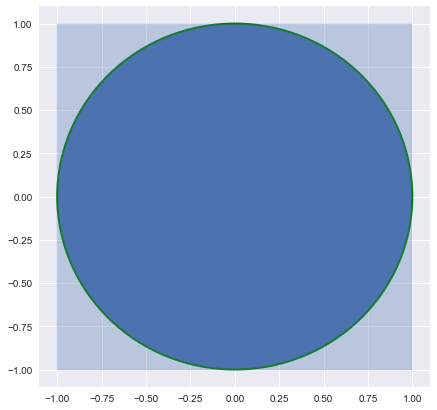

In [24]:
fig = plt.figure(figsize =(7,7))
ax = fig.add_subplot(1,1,1)
circ = plt.Circle((0,0), radius = 1, edgecolor = 'g', lw = 2.0)
box = plt.Rectangle((-1,-1),2,2, edgecolor = 'b',alpha = 0.3)
ax.add_patch(circ)
ax.add_patch(box)

plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)

In [27]:
n = int(1e7)
rn = np.random.rand(n, 2) * 2 - 1
rn.nbytes

160000000

In [28]:
%time distance = np.sqrt((rn ** 2).sum(axis =1))

Wall time: 428 ms


In [29]:
%time frac = (distance <= 1.0).sum()/len(distance)

Wall time: 39 ms


In [30]:
frac * 4

3.1417908

## Binomial Trees

In [35]:
import math

S0 = 36.0
T = 1.0
r = 0.06
sigma = 0.2

def simulate_tree(M):
    dt = T/M
    u = math.exp(sigma * math.sqrt(dt))
    d = 1/u
    
    S = np.zeros((M + 1, M + 1))
    S[0,0] = S0
    
    z = 1
    
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i + 1, t] = S[i, t-1] * d
        z += 1
    return S

In [36]:
simulate_tree(4)

array([[36.        , 39.78615305, 43.97049929, 48.59491707, 53.70568912],
       [ 0.        , 32.57414705, 36.        , 39.78615305, 43.97049929],
       [ 0.        ,  0.        , 29.47430711, 32.57414705, 36.        ],
       [ 0.        ,  0.        ,  0.        , 26.66945594, 29.47430711],
       [ 0.        ,  0.        ,  0.        ,  0.        , 24.13152166]])